In [1]:
#Import packages
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator

C:\Users\mlogt\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Import dataset
df = pd.read_excel("final_df2.xlsx",index_col=0)

In [3]:
data = []
for idx, i in enumerate(list(df['review'].values)):
    data.append(GoogleTranslator(source='nl', target='en').translate(text=i))
    if idx % 1000 == 0:
        print("Reviews translated:",idx)

Reviews translated: 0
Reviews translated: 1000
Reviews translated: 2000
Reviews translated: 3000
Reviews translated: 4000
Reviews translated: 5000
Reviews translated: 6000
Reviews translated: 7000
Reviews translated: 8000
Reviews translated: 9000
Reviews translated: 10000
Reviews translated: 11000
Reviews translated: 12000
Reviews translated: 13000
Reviews translated: 14000
Reviews translated: 15000
Reviews translated: 16000
Reviews translated: 17000
Reviews translated: 18000
Reviews translated: 19000
Reviews translated: 20000
Reviews translated: 21000
Reviews translated: 22000
Reviews translated: 23000
Reviews translated: 24000
Reviews translated: 25000
Reviews translated: 26000
Reviews translated: 27000
Reviews translated: 28000
Reviews translated: 29000
Reviews translated: 30000
Reviews translated: 31000
Reviews translated: 32000
Reviews translated: 33000
Reviews translated: 34000
Reviews translated: 35000
Reviews translated: 36000
Reviews translated: 37000
Reviews translated: 38000

In [35]:
counter = 0
for i in data:
    for j in i.split():
        if j == 'listen':
            counter += 1
for i in range(counter):
    data.append('listening')

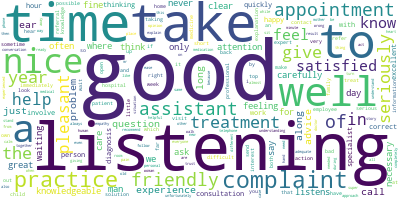

In [44]:
#Wordcloud: overall
long_string = ' '.join(data) #Join all reviews into one string
#Based on: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
wordcloud = WordCloud(collocations=False,stopwords=['listen'],background_color="white", contour_width=3, contour_color='steelblue') #Set wordcloud settings
wordcloud.generate(long_string) #Generate wordcloud
wordcloud.to_file('wordcloud_all.pdf') #Export to file
wordcloud.to_image()

<ipython-input-40-2c558510e2d0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_ratings = list(pd.DataFrame(data[:58793])[df['avg_rating'] < 6][0])


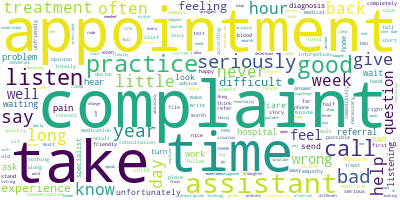

In [40]:
#Low ratings word cloud (explanation code: see above)
low_ratings = list(pd.DataFrame(data[:58793])[df['avg_rating'] < 6][0])
long_string = ' '.join(low_ratings)
wordcloud = WordCloud(collocations=False,background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_file('wordcloud_low.pdf')
wordcloud.to_image()

In [ ]:
#Subset ratings into low, medium and high
med_ratings = df[(df['avg_rating'] >= 6) & (df['avg_rating'] < 9)]
high_ratings = df[df['avg_rating'] >= 9]

In [ ]:
#Medium ratings word cloud (explanation code: see above)
long_string = ' '.join(list(med_ratings['review'].values))
wordcloud = WordCloud(collocations=False,stopwords=['listen'],background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
#High ratings word cloud (explanation code: see above)
long_string = ' '.join(list(high_ratings['review'].values))
wordcloud = WordCloud(collocations=False,stopwords=['listen'],background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
#Histogram of average ratings in reviews
plt.figure(figsize=(10,4)) #Set figure+size
sns.histplot(df['avg_rating'],binwidth=0.5) #Define histplot
plt.xlabel("Average rating") #Define X label
plt.ylabel("Number of reviews") #Define Y label
plt.xlim(0.9,10.1) #Set X axis limits
plt.savefig('hist_grades.pdf', dpi=100) #Export figure

In [ ]:
#Print dataset sizes each
print(len(df[df['avg_rating']<6]))
print(len(df[(df['avg_rating']>=6) & (df['avg_rating']<9)]))
print(len(df[df['avg_rating']>=9]))